# Regression Lines
Regression lines to predict trend of data.

In [2]:
# Enable Intellisense
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
from matplotlib import pyplot, dates
import plotly.express as px 
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.io as pio
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Annoying warning
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
cumulative_confirmed = pd.read_csv("data/daily_cumulative_confirmed.csv")
cumulative_confirmed['date'] = pd.to_datetime(cumulative_confirmed['date'], format='%d-%m-%Y')
cumulative_confirmed.tail()

,date,daily_cases,cumulative_cases
15,2020-03-22,34,274
16,2020-03-23,128,402
17,2020-03-24,152,554
18,2020-03-25,155,709
19,2020-03-25,218,927


**Date since start**

In [4]:
start_date = cumulative_confirmed['date'][0]
start_date

Timestamp('2020-03-05 00:00:00')

In [5]:
cumulative_confirmed['days_since_start'] = cumulative_confirmed['date'].apply(lambda x: (x-start_date).days)
cumulative_confirmed

,date,daily_cases,cumulative_cases,days_since_start
0,2020-03-05,1,1,0
1,2020-03-07,1,2,2
2,2020-03-08,1,3,3
3,2020-03-09,4,7,4
4,2020-03-11,6,13,6
5,2020-03-12,3,16,7
6,2020-03-13,8,24,8
7,2020-03-14,14,38,9
8,2020-03-15,13,51,10
9,2020-03-16,11,62,11


## Scipy fit curve

In [6]:
from scipy.optimize import curve_fit

In [7]:
def func(x, a, b, c):
    return a * b ** x + c

In [8]:
xdata = cumulative_confirmed['days_since_start']
ydata = cumulative_confirmed['cumulative_cases']

In [9]:
popt, pcov = curve_fit(func, xdata, ydata)

In [10]:
popt

array([ 1.26883395,  1.37950718, 11.18091338])

In [11]:
xdata_pred = xdata.append(pd.Series(range(20,26)), ignore_index=True)
y_data_pred = func(xdata_pred, *popt)
# xdata_pred

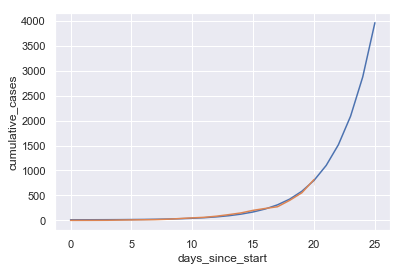

In [12]:
sns.lineplot(xdata_pred, y_data_pred)
sns.lineplot(xdata, ydata)

In [13]:
y_data_pred = y_data_pred.apply(lambda x: round(x))

In [14]:
predict_cum_confirmed = pd.DataFrame(data={'days_since_start':xdata_pred, 'cumulative_cases':y_data_pred})
predict_cum_confirmed

,days_since_start,cumulative_cases
0,0,12
1,2,14
2,3,15
3,4,16
4,6,20
5,7,23
6,8,28
7,9,34
8,10,43
9,11,55


In [15]:
start_date + timedelta(days=22)

Timestamp('2020-03-27 00:00:00')

In [16]:
predict_cum_confirmed['date'] = predict_cum_confirmed['days_since_start'].apply(lambda x: start_date + timedelta(days=x))
predict_cum_confirmed

,days_since_start,cumulative_cases,date
0,0,12,2020-03-05
1,2,14,2020-03-07
2,3,15,2020-03-08
3,4,16,2020-03-09
4,6,20,2020-03-11
5,7,23,2020-03-12
6,8,28,2020-03-13
7,9,34,2020-03-14
8,10,43,2020-03-15
9,11,55,2020-03-16


In [17]:
predict_cum_confirmed.set_index('date', inplace=True)
predict_cum_confirmed

,days_since_start,cumulative_cases
date,,
2020-03-05,0,12
2020-03-07,2,14
2020-03-08,3,15
2020-03-09,4,16
2020-03-11,6,20
2020-03-12,7,23
2020-03-13,8,28
2020-03-14,9,34
2020-03-15,10,43


### Daily

In [18]:
predict_cum_daily_confirmed = predict_cum_confirmed.copy()

In [19]:
predict_cum_daily_confirmed['daily_cases'] = predict_cum_daily_confirmed['cumulative_cases'].diff()
predict_cum_daily_confirmed['daily_cases'][0] = predict_cum_daily_confirmed['cumulative_cases'][0]
predict_cum_daily_confirmed

,days_since_start,cumulative_cases,daily_cases
date,,,
2020-03-05,0,12,12.0
2020-03-07,2,14,2.0
2020-03-08,3,15,1.0
2020-03-09,4,16,1.0
2020-03-11,6,20,4.0
2020-03-12,7,23,3.0
2020-03-13,8,28,5.0
2020-03-14,9,34,6.0
2020-03-15,10,43,9.0


In [20]:
predict_cum_daily_confirmed['daily_cases'][18:].pct_change().mean() * 100

inf

In [21]:
predict_cum_daily_confirmed['cumulative_cases'][18:].pct_change().mean() * 100

26.876610040152215

In [22]:
predict_cum_daily_confirmed.drop('days_since_start', axis = 1).to_csv('data/predict_confirmed.csv')